#Medical Insurance Cost Prediction using Machine Learning with Python

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mirichoi0218/insurance")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'insurance' dataset.
Path to dataset files: /kaggle/input/insurance


In [6]:
df = pd.read_csv(path +'/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.shape

(1338, 7)

Categorical columns

sex
smoker
region

In [13]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


data analysis



In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


distribution of age value

/tmp/ipython-input-201379171.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


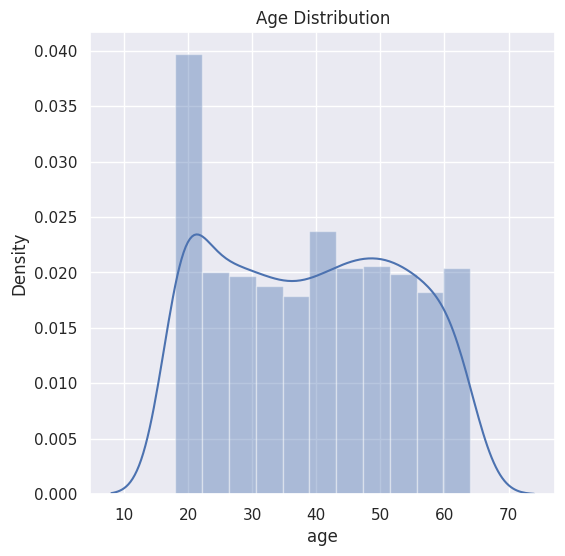

In [16]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

In [19]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

Gender plot

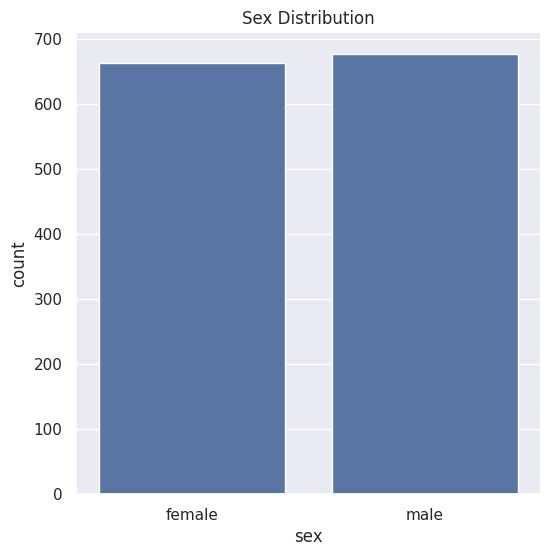

In [17]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.show()

In [18]:
df['sex'].value_counts()

,count
sex,
male,676
female,662


/tmp/ipython-input-4153091639.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


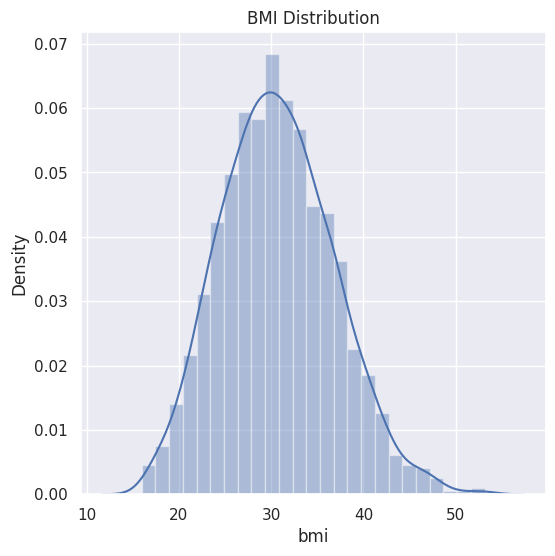

In [20]:
#bmi distribution

plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

normal bmi range is 18.5 -> 24.9

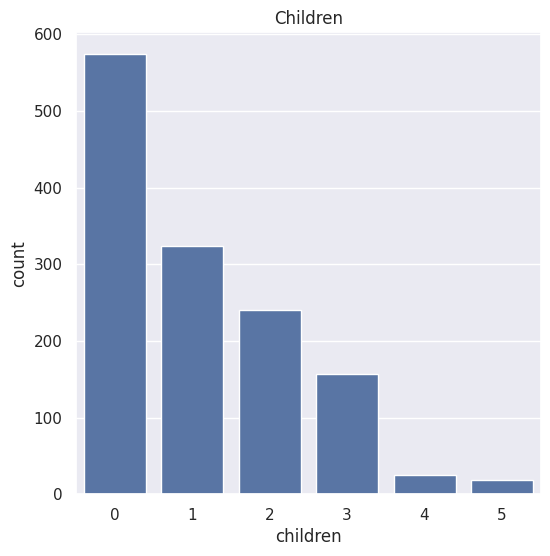

In [21]:
#children column

plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title('Children')
plt.show()

In [22]:
df['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


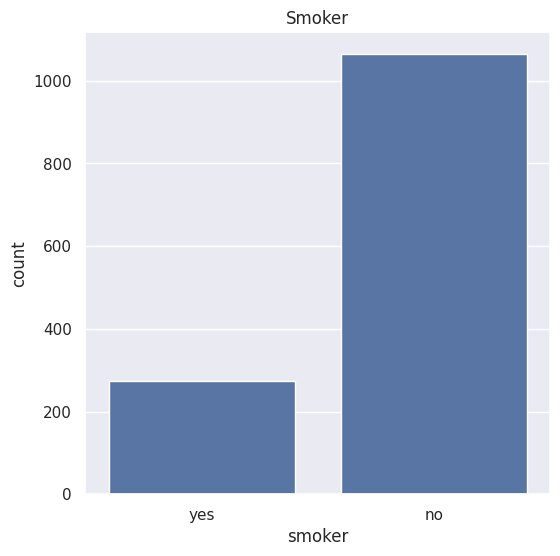

In [23]:
#smoker column

plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

In [24]:
df['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


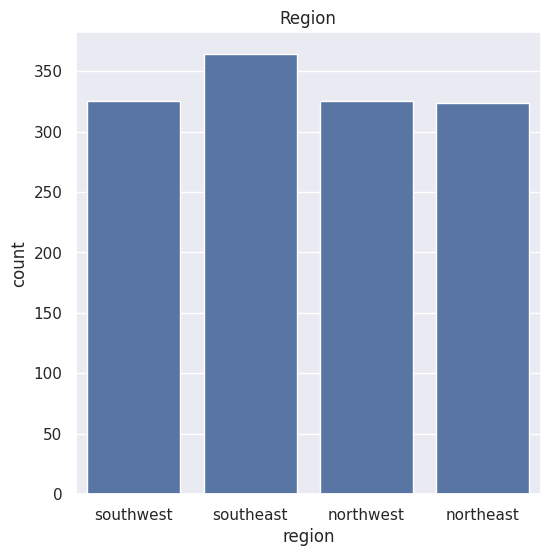

In [25]:
# region column

plt.figure(figsize=(6,6))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

In [26]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


/tmp/ipython-input-114809915.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


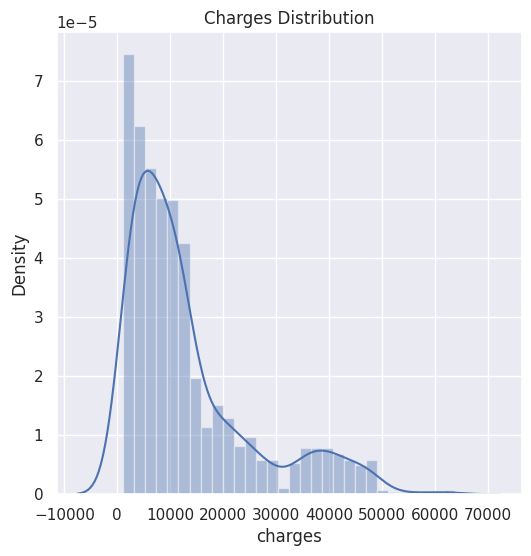

In [27]:
#charges column

plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

data preprocessing

Encoding the categorical features

In [28]:
#encoding sex column

df.replace({'sex':{'male':0,'female':1}}, inplace=True)

/tmp/ipython-input-1387433806.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'sex':{'male':0,'female':1}}, inplace=True)


In [30]:
# df['sex']

In [31]:
#encoding smoker column

df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

/tmp/ipython-input-2703953033.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'smoker':{'yes':0,'no':1}}, inplace=True)


In [32]:
#encoding region

df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)



/tmp/ipython-input-3492710964.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)


In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [36]:
# df.info()


split the features and target


In [37]:
X=df.drop(columns='charges', axis=1)
Y=df['charges']

In [39]:
print(X)
print(Y)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]
0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


split train and test data

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [42]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [44]:
model = LinearRegression()



In [45]:
model.fit(X_train, Y_train)

LinearRegression()

In [52]:
#evaluate

training_data_prediction = model.predict(X_train)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared value = ', r2_train)





R Squared value =  0.751505643411174


In [53]:
# Predictions
test_data_prediction = model.predict(X_test)

# R2 score
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared value = ', r2_test)





R Squared value =  0.7447273869684076


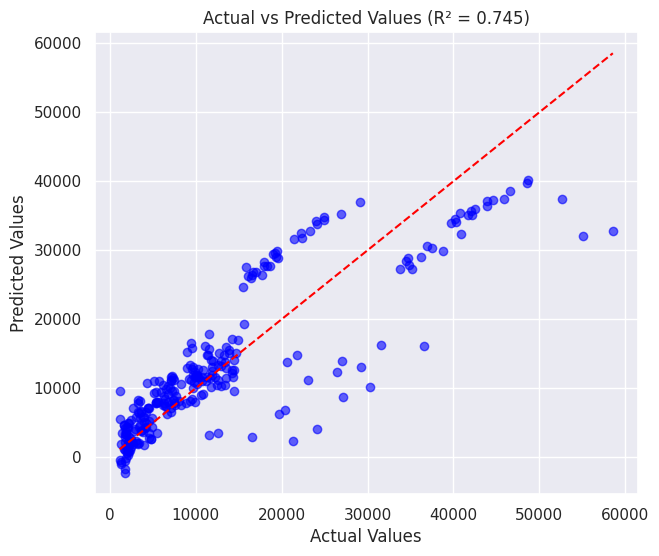

In [54]:
# -----------------------------
# 1. Actual vs Predicted Values
# -----------------------------
plt.figure(figsize=(7, 6))
plt.scatter(Y_test, test_data_prediction, color='blue', alpha=0.6)
plt.plot([Y_test.min(), Y_test.max()],
         [Y_test.min(), Y_test.max()],
         color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs Predicted Values (R² = {r2_test:.3f})")
plt.grid(True)
plt.show()


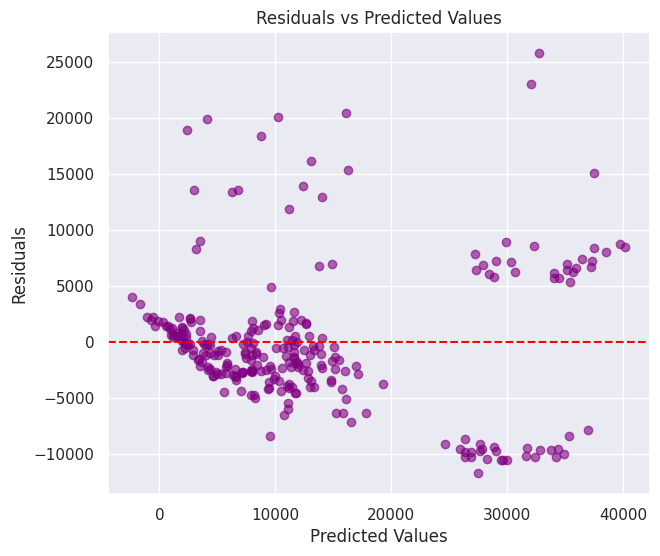

In [55]:
# -----------------------------
# 2. Residuals Plot
# -----------------------------
residuals = Y_test - test_data_prediction

plt.figure(figsize=(7, 6))
plt.scatter(test_data_prediction, residuals, color='purple', alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.show()


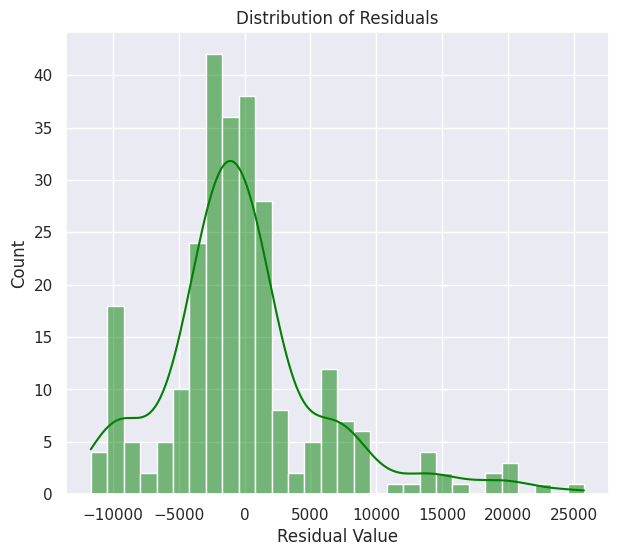

In [56]:
# -----------------------------
# 3. Residuals Distribution
# -----------------------------
plt.figure(figsize=(7, 6))
sns.histplot(residuals, bins=30, kde=True, color='green')
plt.xlabel("Residual Value")
plt.title("Distribution of Residuals")
plt.grid(True)
plt.show()

In [60]:
#predictvie system
def predict_insurance_cost(model, age, sex, bmi, children, smoker, region):
    data = pd.DataFrame([{
        'age': age,
        'sex': sex,
        'bmi': bmi,
        'children': children,
        'smoker': smoker,
        'region': region
    }])
    return model.predict(data)[0]

cost = predict_insurance_cost(model, 31, 1, 25.74, 0, 1, 0)
print(f"The insurance cost is USD {cost:,.2f}")



The insurance cost is USD 3,760.08
